In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style="white", palette=None,rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [2]:
data_houses = pd.read_csv('/kaggle/input/house-price-dataset/housing.csv')
data_houses.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
data_houses.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [4]:
data_houses.sample(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3879     -118.51     34.22                36.0       1952.0           387.0   
20519    -121.53     38.58                33.0       4988.0          1169.0   
12375    -116.38     33.74                 7.0      17579.0          3479.0   

       population  households  median_income  median_house_value  \
3879       1156.0       392.0         4.1850            209200.0   
20519      2414.0      1075.0         1.9728             76400.0   
12375      3581.0      1820.0         4.0840            194500.0   

      ocean_proximity  
3879        <1H OCEAN  
20519          INLAND  
12375          INLAND

# **Describing data**

In [5]:
data_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data_houses.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
data_houses.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [8]:
data_houses.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

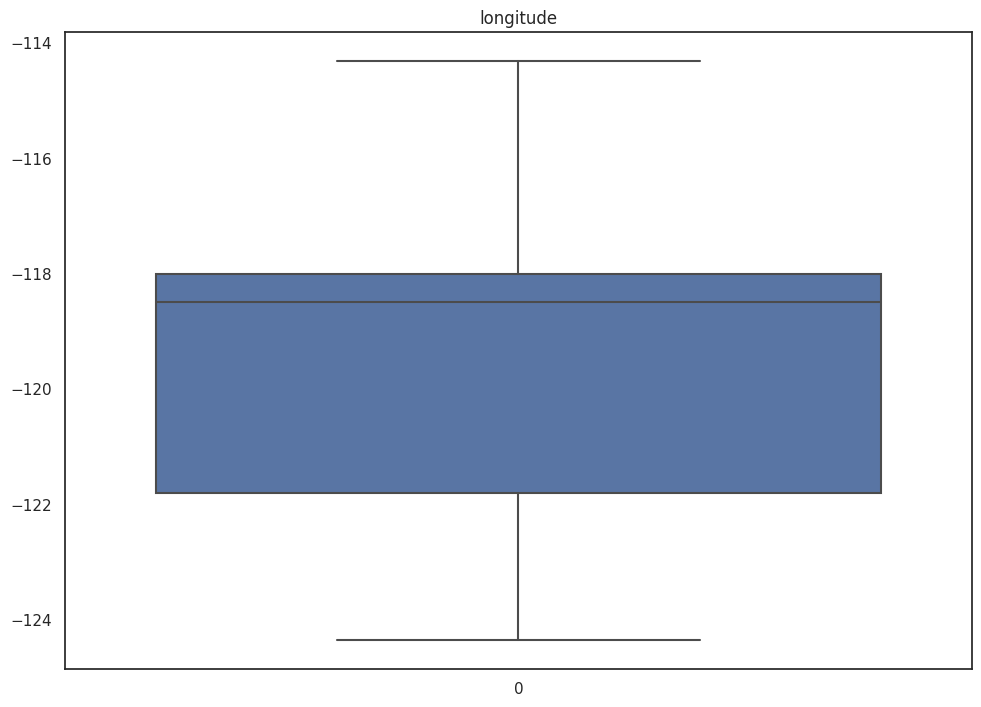

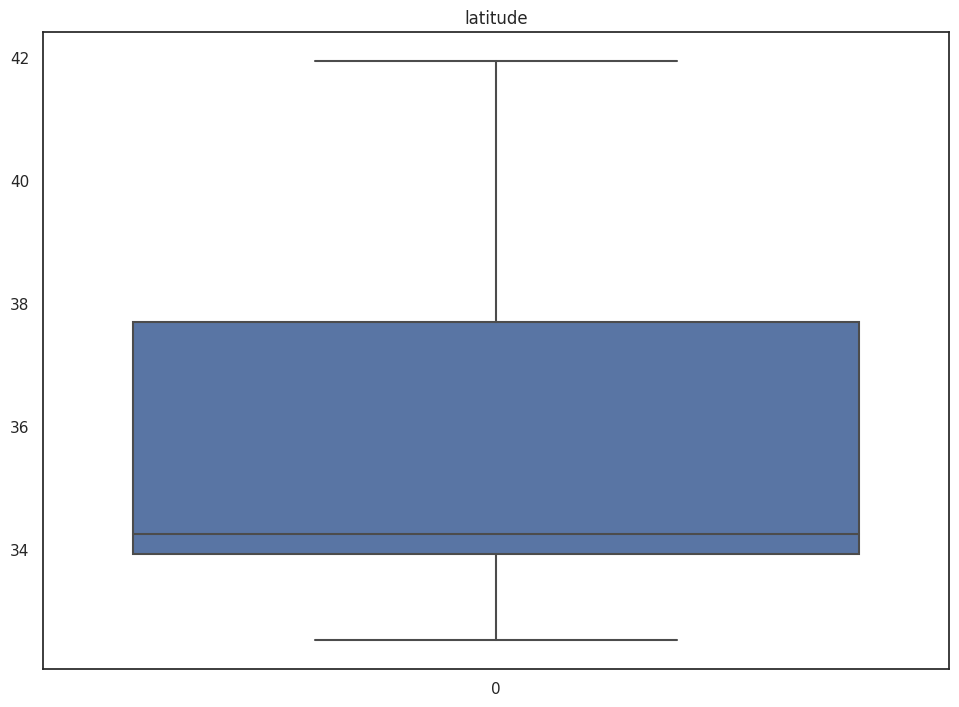

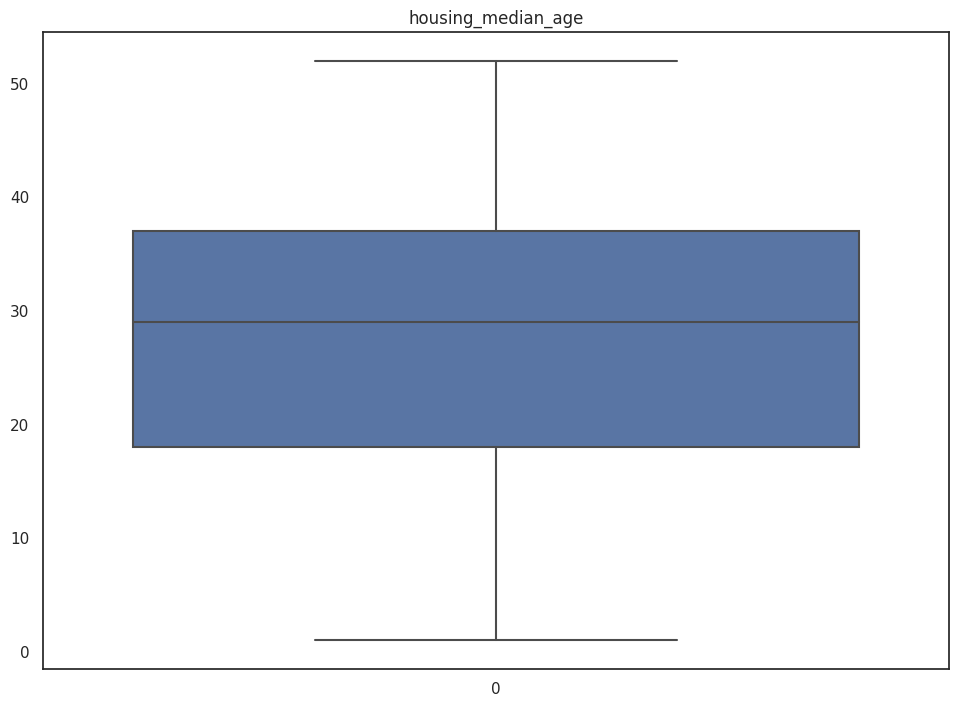

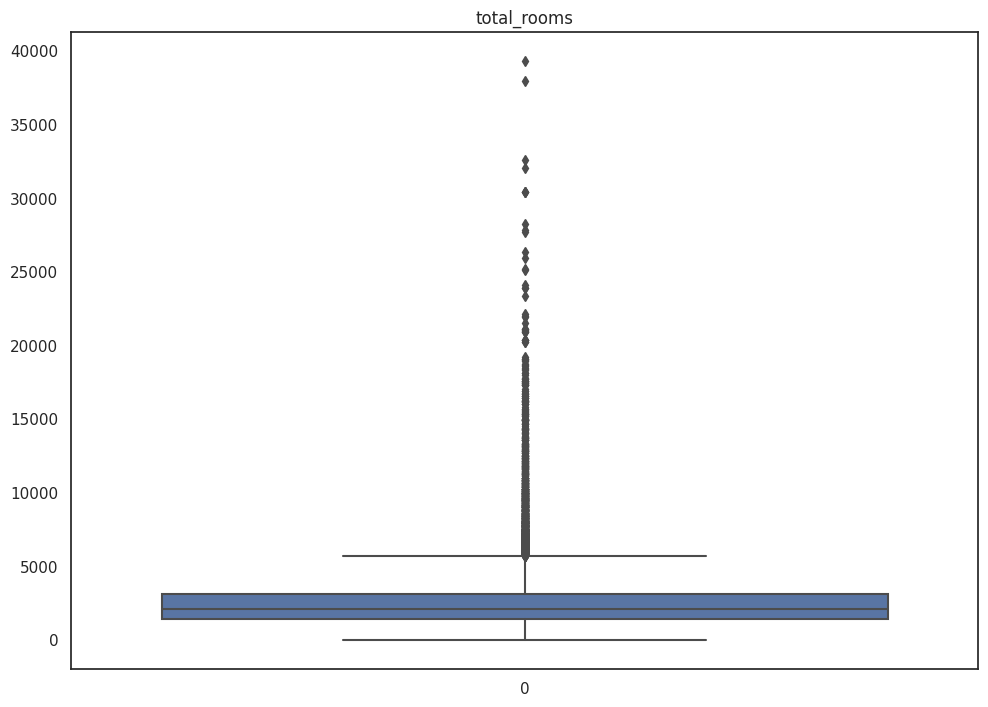

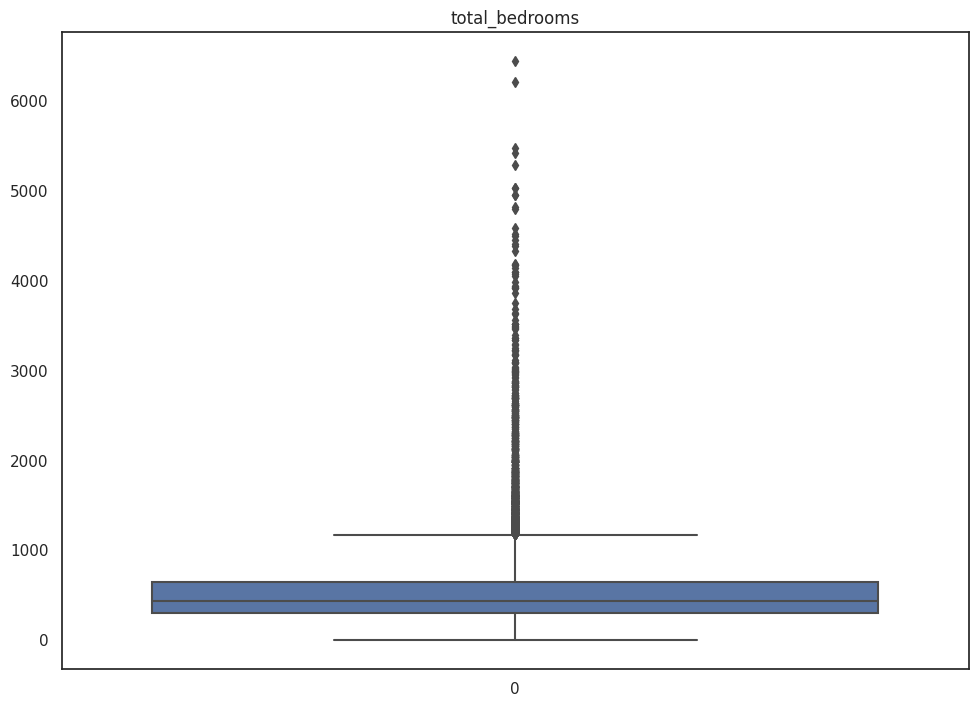

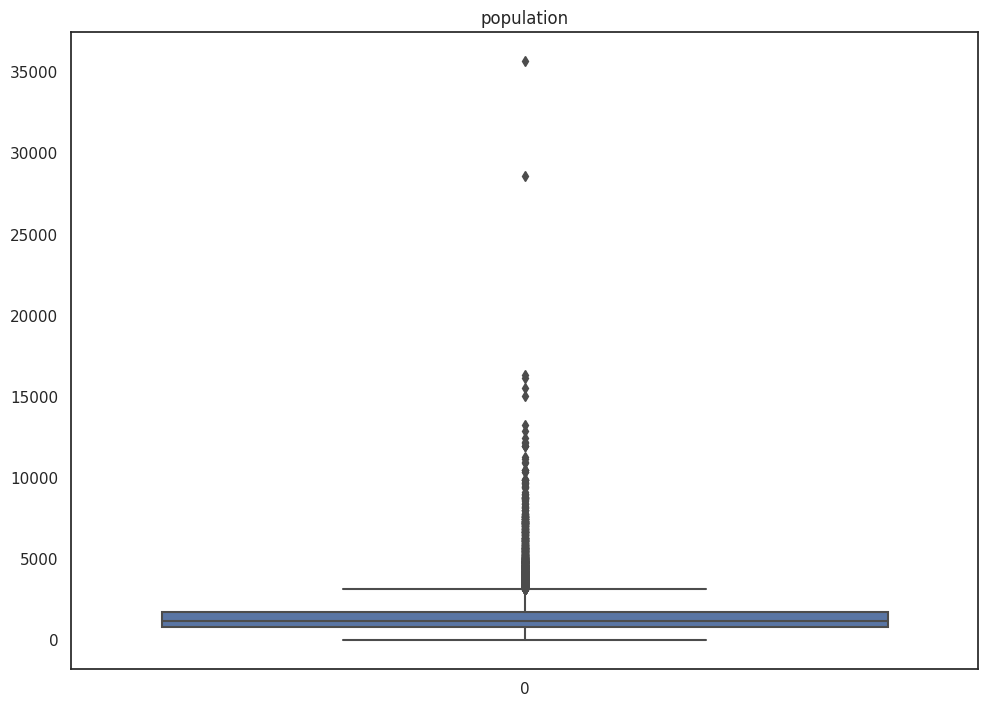

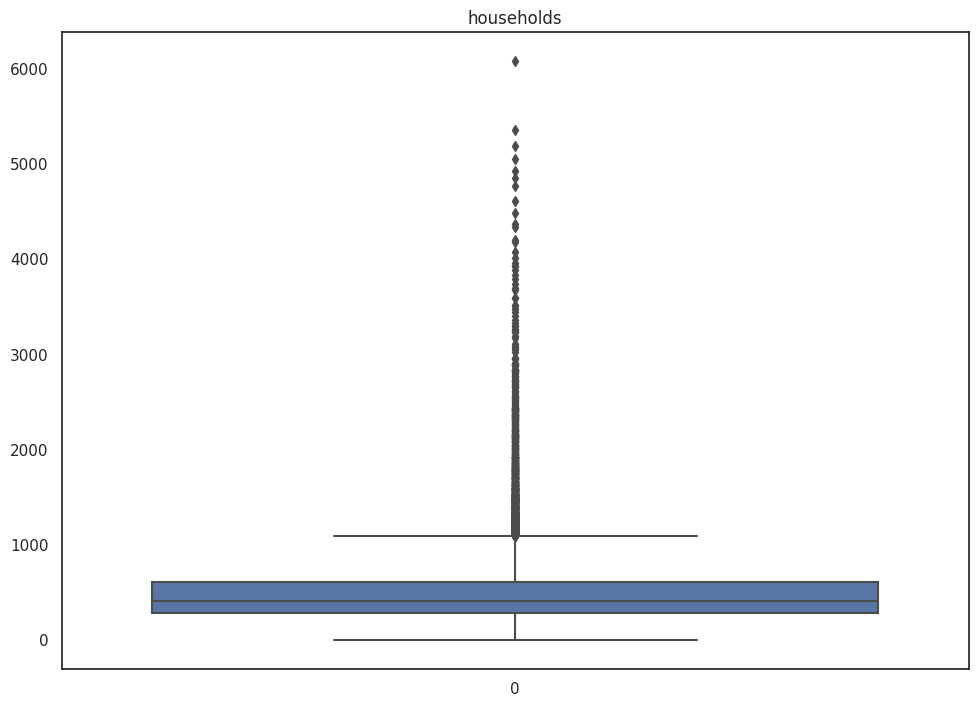

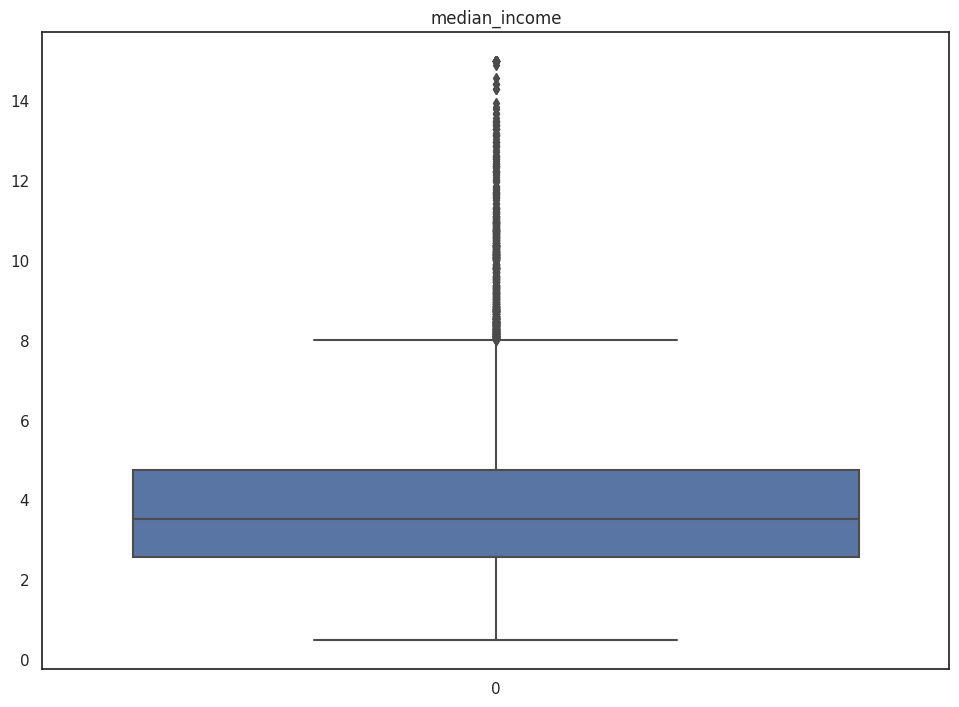

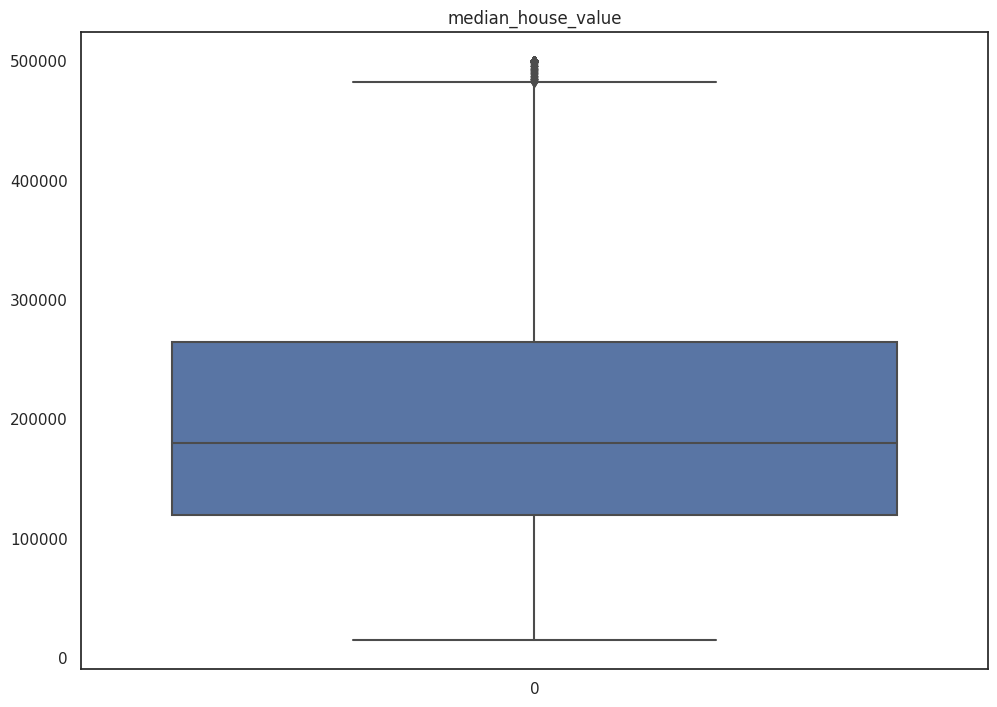

In [9]:
for col in data_houses.columns:
    if col!= "ocean_proximity":
        sns.boxplot(data_houses[col]) 
        plt.title(col)
        plt.show()
    

In [10]:
data_houses.describe(include="object")

ocean_proximity
count            20640
unique               5
top          <1H OCEAN
freq              9136

In [11]:
data_houses=data_houses.drop(['longitude','latitude'] ,axis=1 )
data_houses.head(3)

housing_median_age  total_rooms  total_bedrooms  population  households  \
0                41.0        880.0           129.0       322.0       126.0   
1                21.0       7099.0          1106.0      2401.0      1138.0   
2                52.0       1467.0           190.0       496.0       177.0   

   median_income  median_house_value ocean_proximity  
0         8.3252            452600.0        NEAR BAY  
1         8.3014            358500.0        NEAR BAY  
2         7.2574            352100.0        NEAR BAY

In [12]:
oca_count=data_houses["ocean_proximity"].value_counts()
oca_count

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

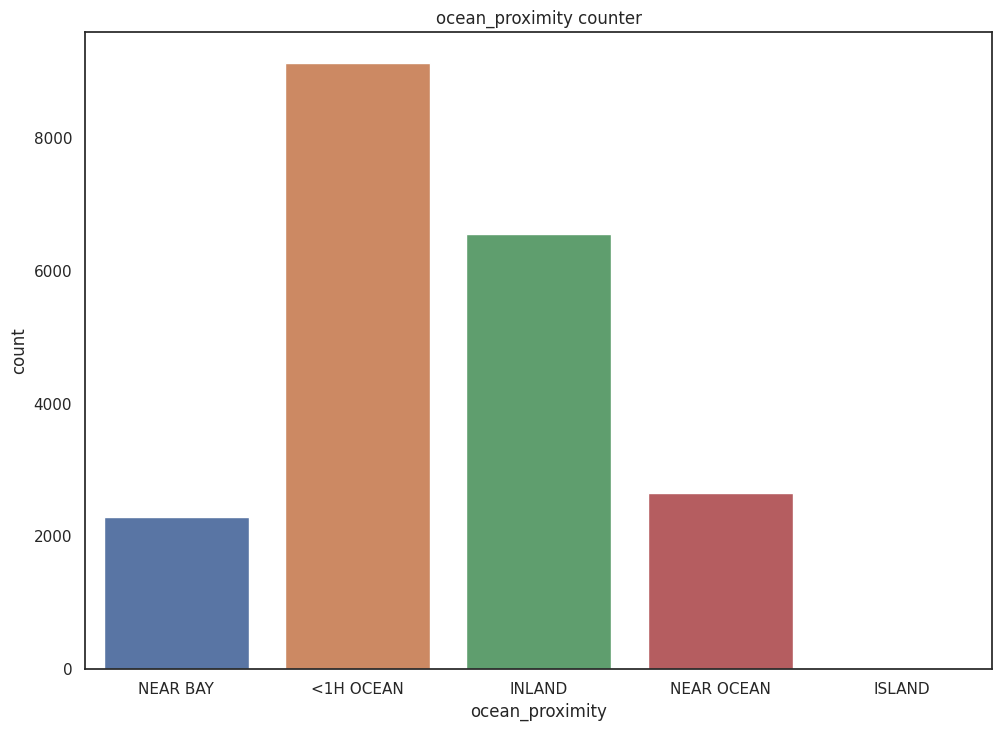

In [13]:
sns.countplot(x=data_houses["ocean_proximity"], data=data_houses)
plt.title("ocean_proximity counter")
plt.show()

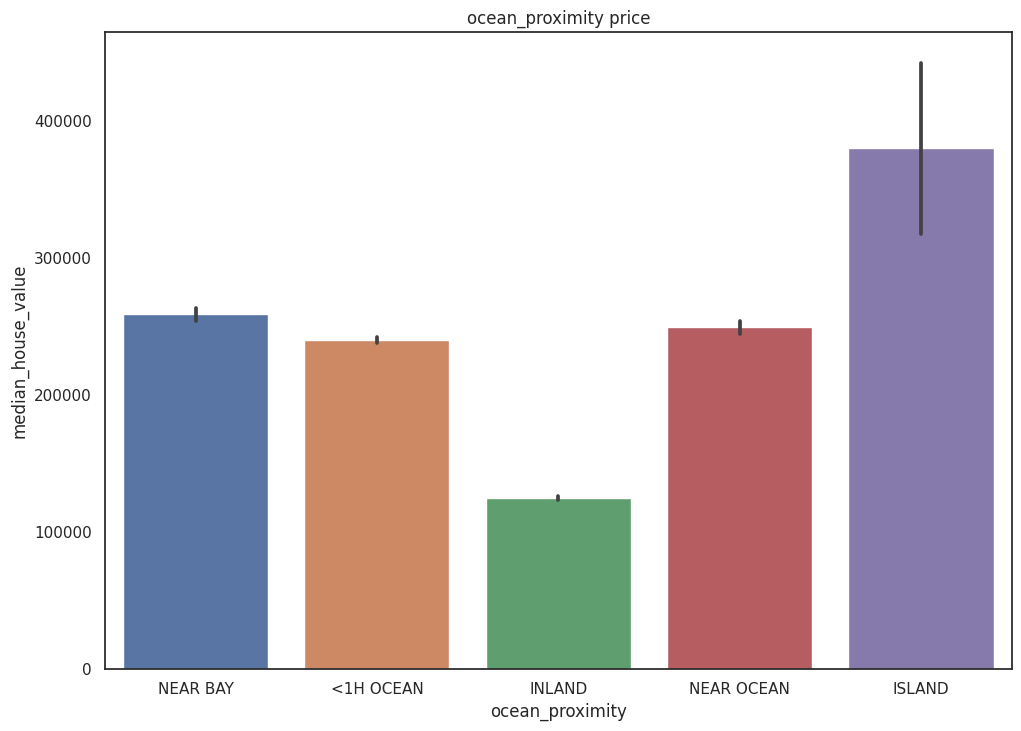

In [14]:
sns.barplot(x=data_houses["ocean_proximity"],y=data_houses["median_house_value"] ,data=data_houses)
plt.title("ocean_proximity price")
plt.show()

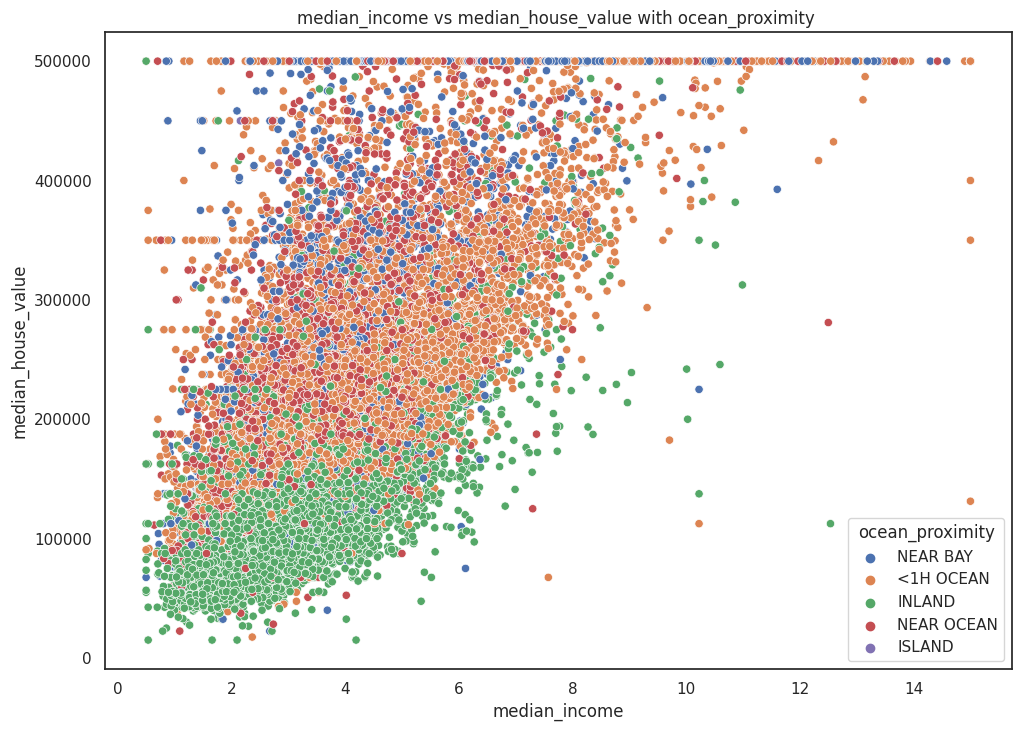

In [15]:
sns.scatterplot(x=data_houses["median_income"],y=data_houses["median_house_value"],hue="ocean_proximity" ,data=data_houses)
plt.title("median_income vs median_house_value with ocean_proximity ")
plt.show()

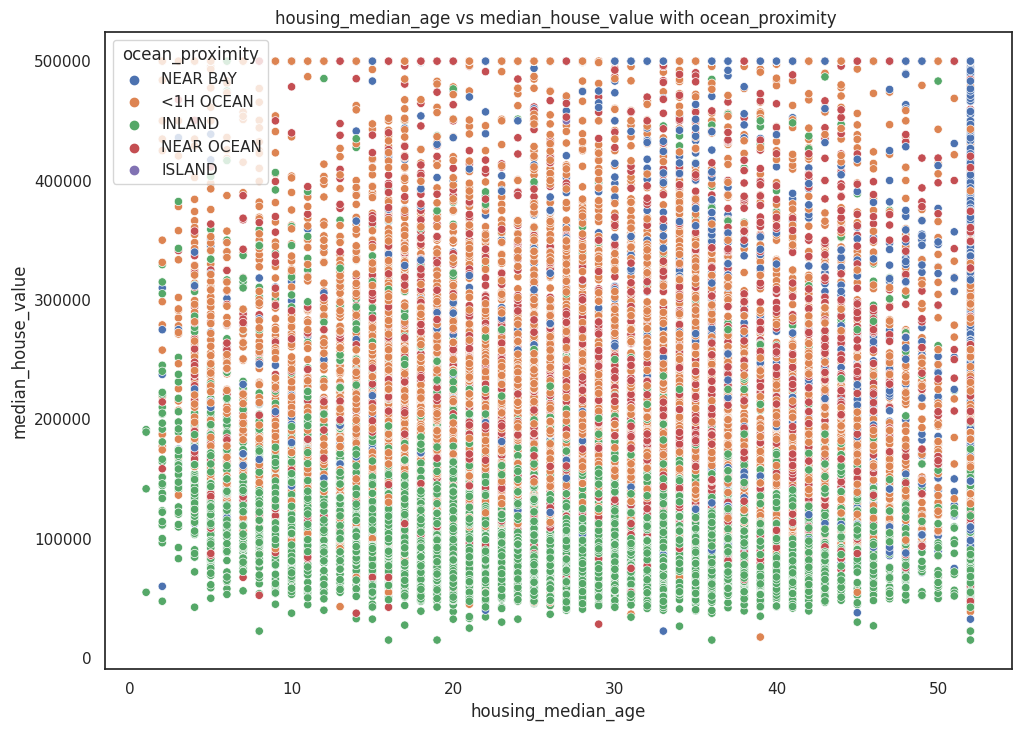

In [16]:
sns.scatterplot(x=data_houses["housing_median_age"],y=data_houses["median_house_value"],hue="ocean_proximity" ,data=data_houses)
plt.title("housing_median_age vs median_house_value with ocean_proximity ")
plt.show()

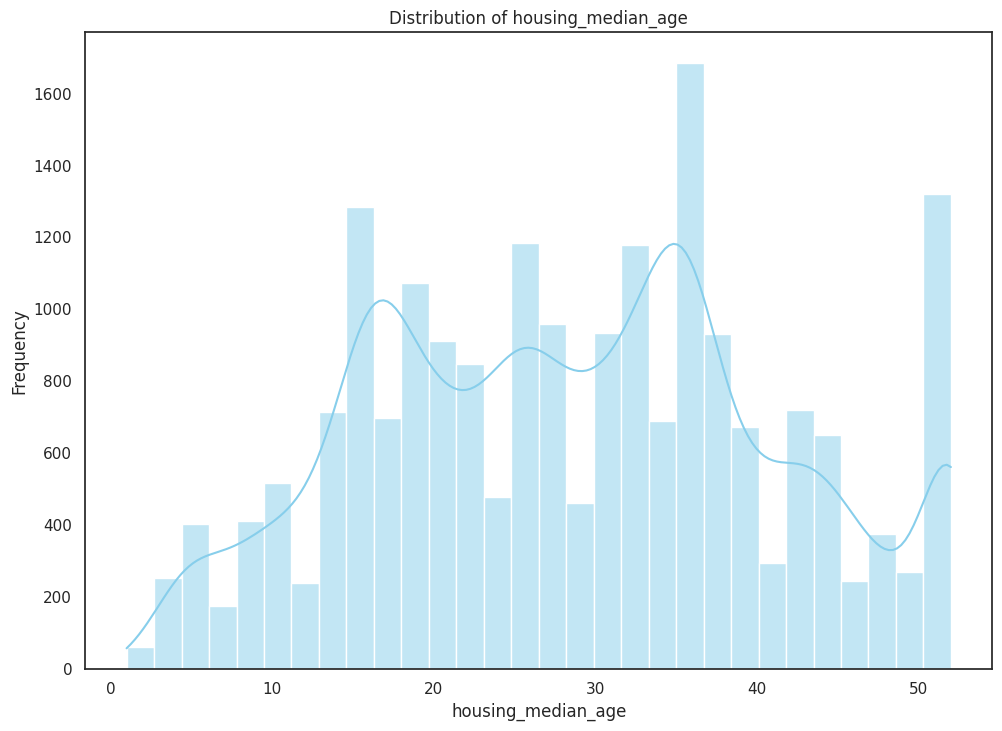

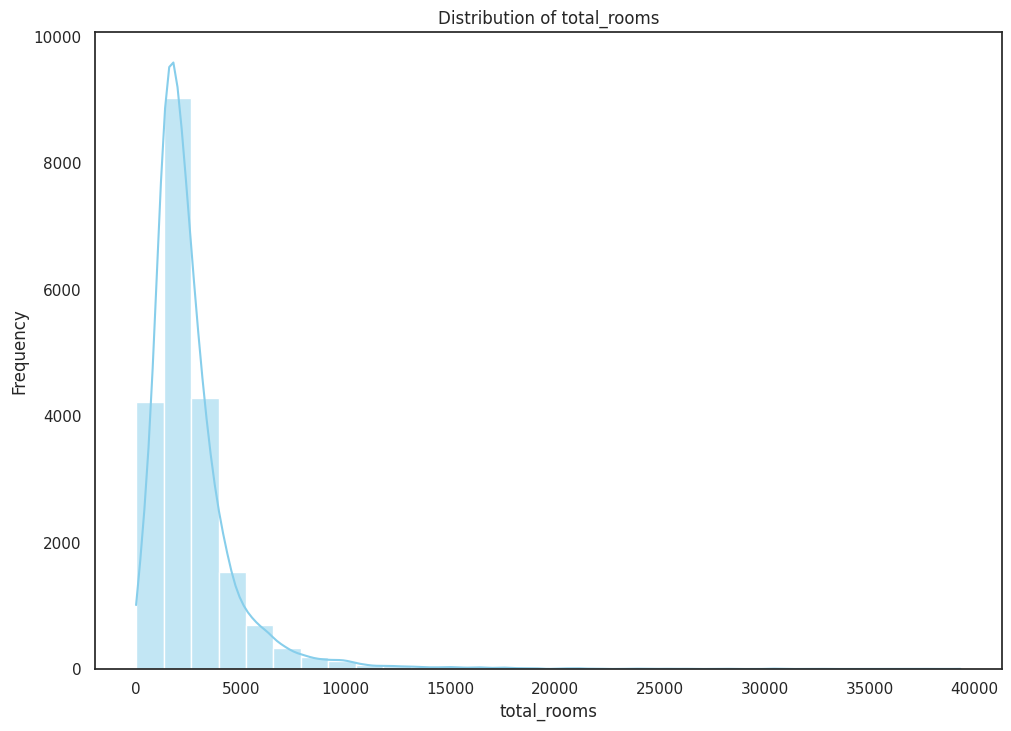

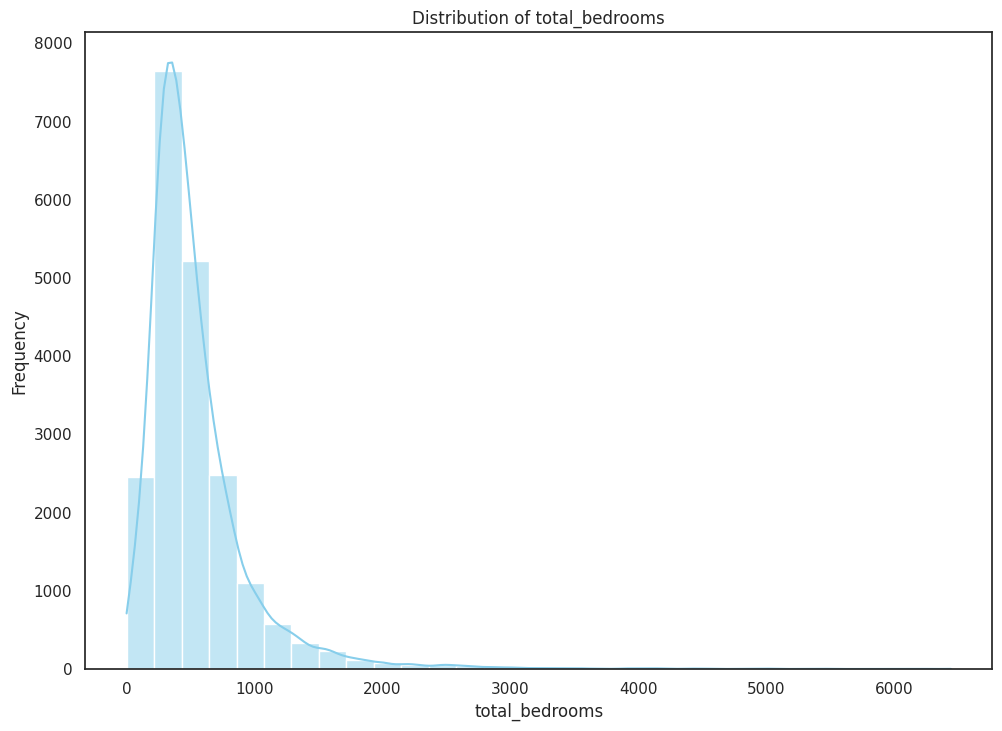

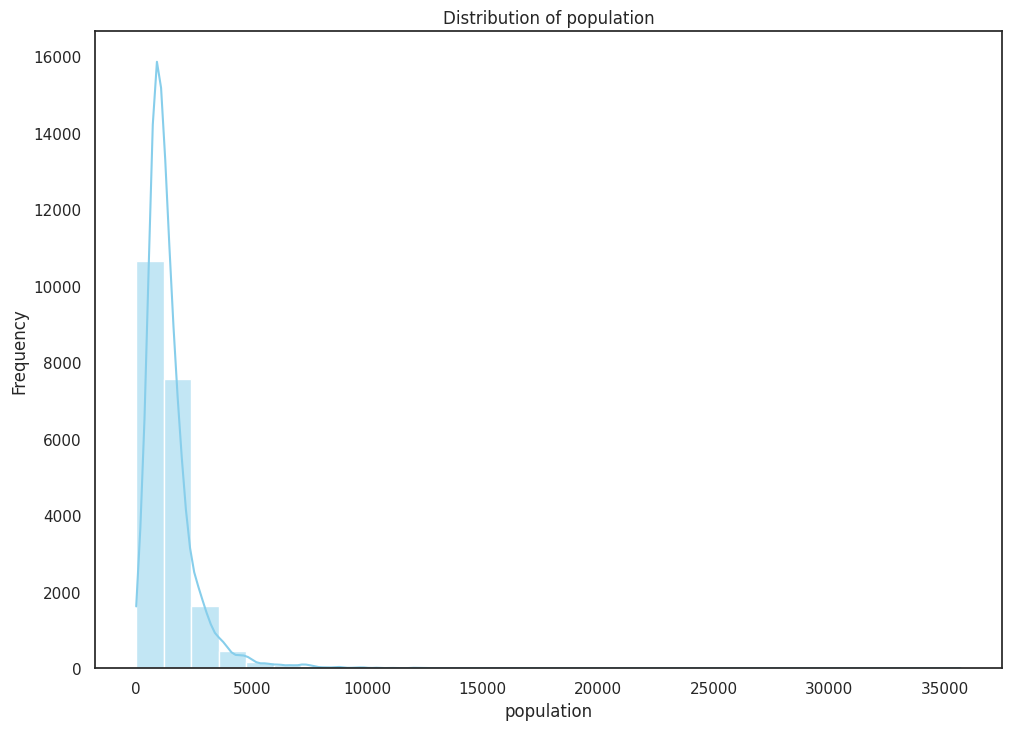

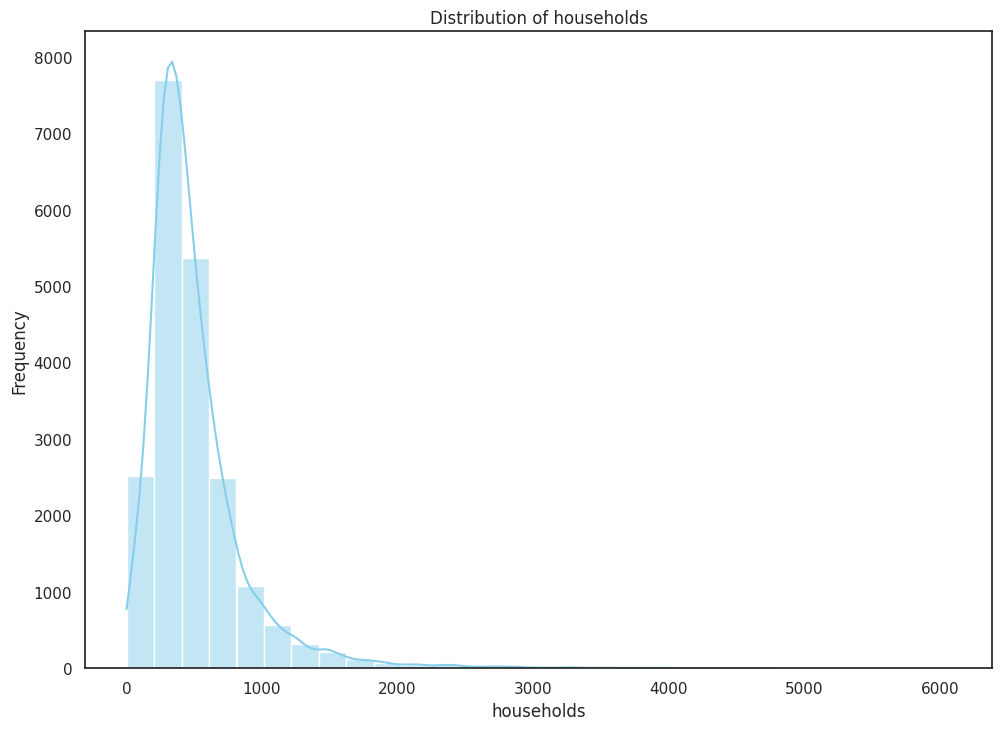

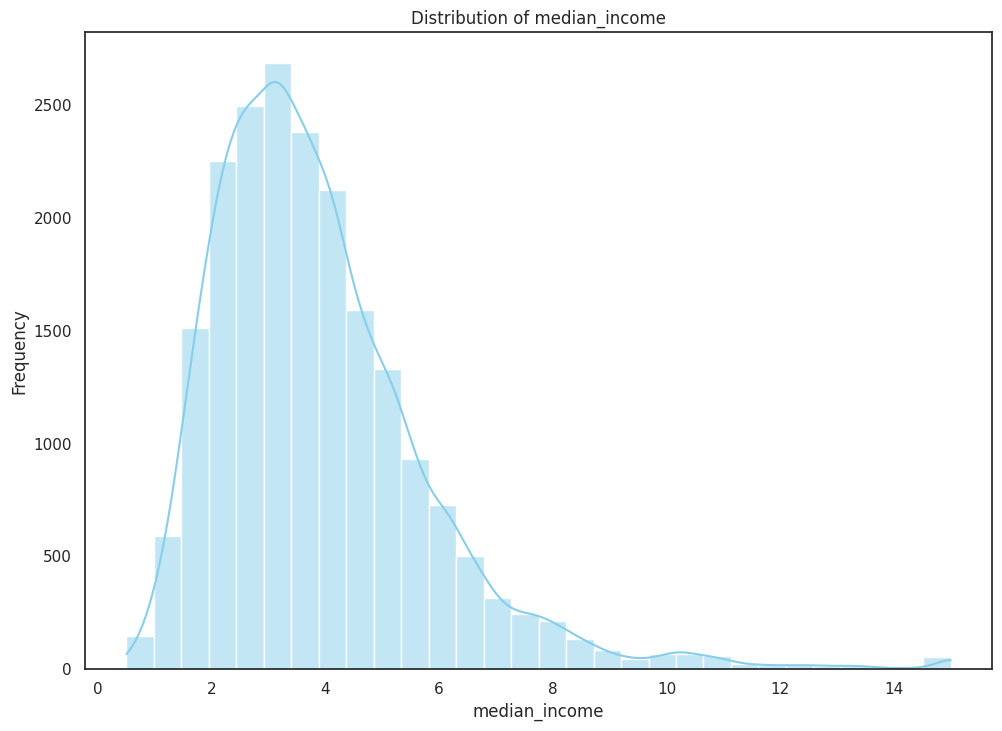

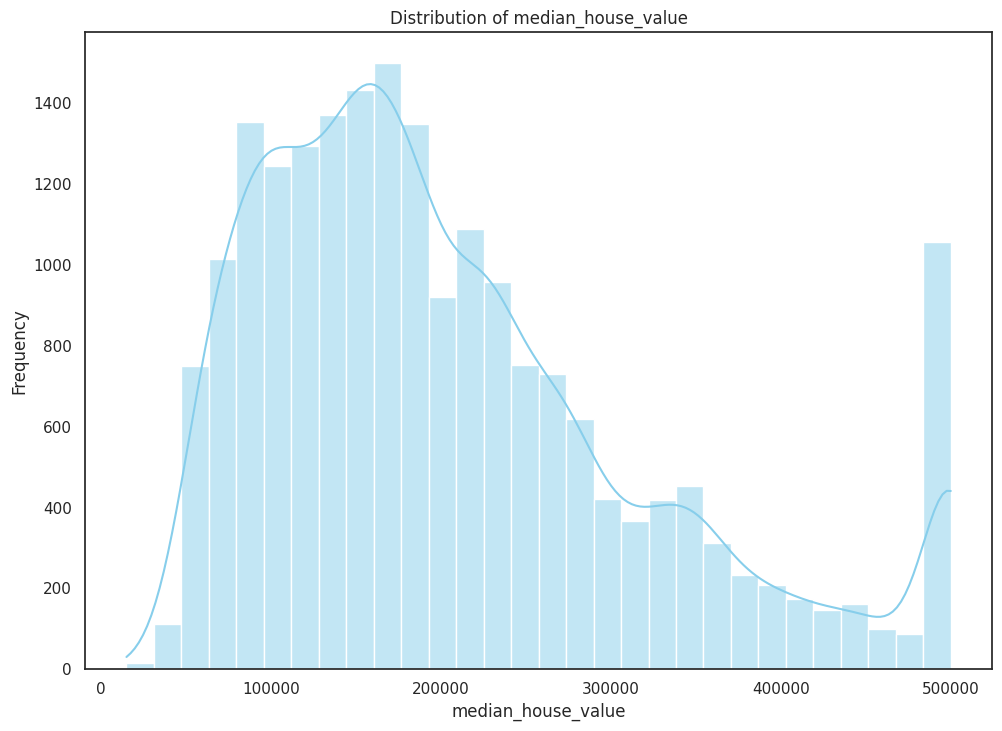

In [17]:
for col in data_houses.columns:
    if col!= "ocean_proximity":
        sns.histplot(data_houses[col], bins=30, kde=True, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.ylabel('Frequency')
        plt.show()

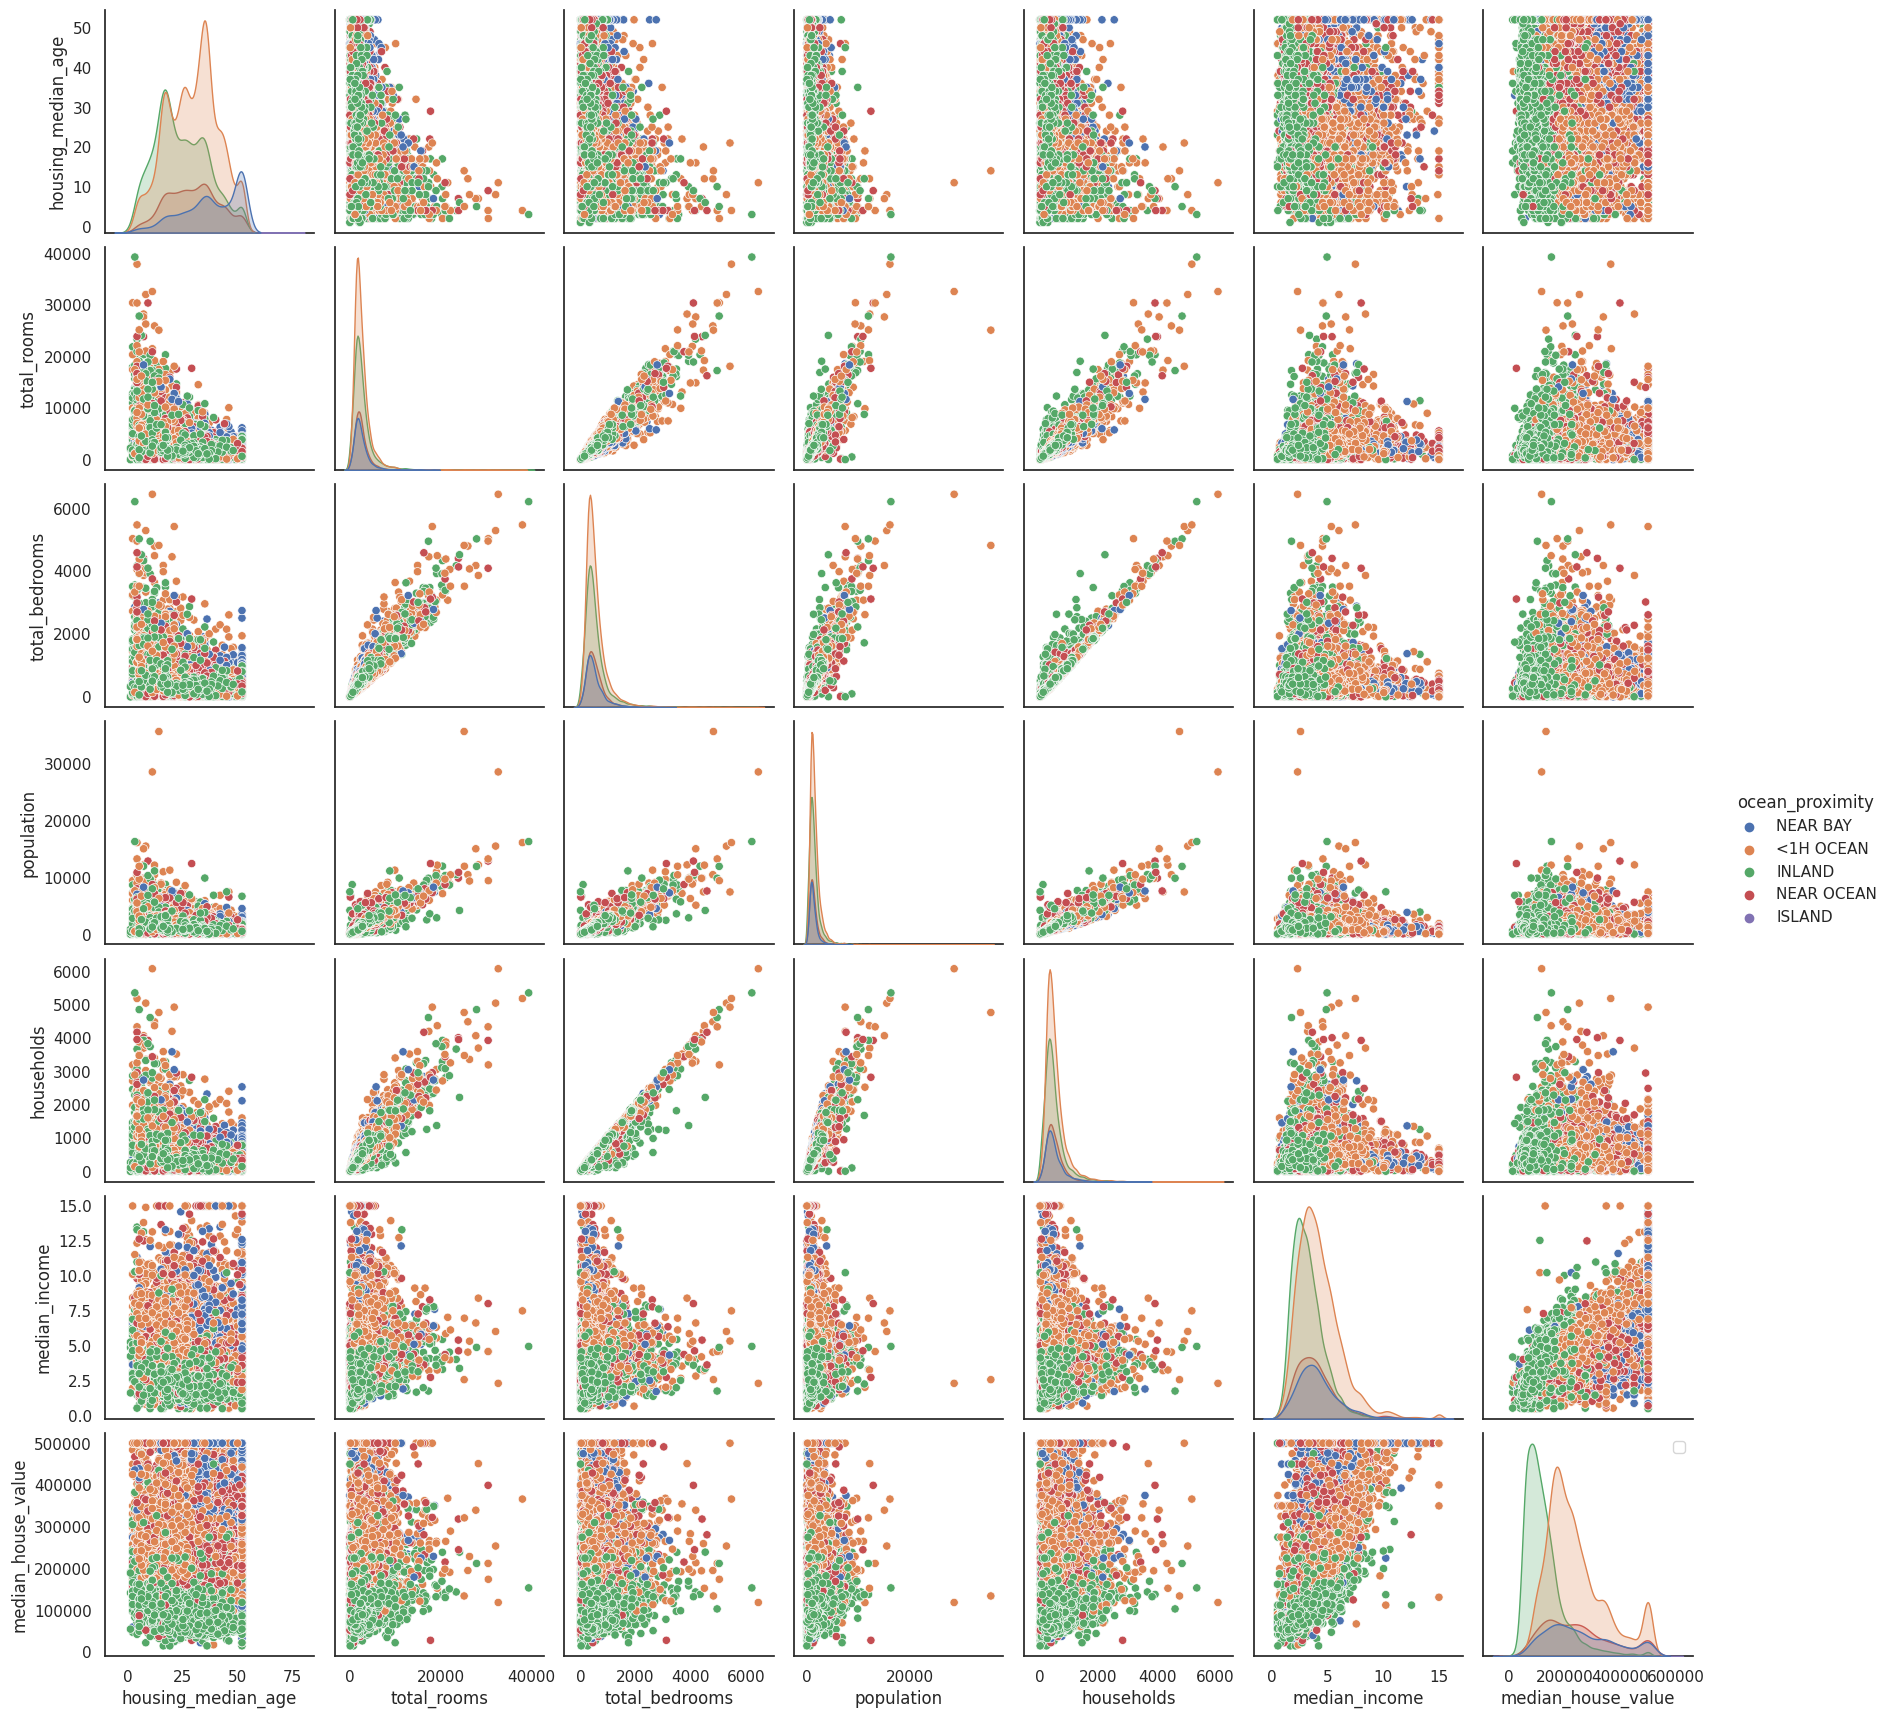

In [18]:
sns.pairplot(data_houses, hue="ocean_proximity")
plt.legend(loc="best")
plt.show()

In [19]:
data_corr=data_houses.drop(["ocean_proximity"],axis=1)
data_corr.head(2)

housing_median_age  total_rooms  total_bedrooms  population  households  \
0                41.0        880.0           129.0       322.0       126.0   
1                21.0       7099.0          1106.0      2401.0      1138.0   

   median_income  median_house_value  
0         8.3252            452600.0  
1         8.3014            358500.0

In [20]:
h=data_corr.corr()
h

housing_median_age  total_rooms  total_bedrooms  \
housing_median_age            1.000000    -0.361262       -0.320451   
total_rooms                  -0.361262     1.000000        0.930380   
total_bedrooms               -0.320451     0.930380        1.000000   
population                   -0.296244     0.857126        0.877747   
households                   -0.302916     0.918484        0.979728   
median_income                -0.119034     0.198050       -0.007723   
median_house_value            0.105623     0.134153        0.049686   

                    population  households  median_income  median_house_value  
housing_median_age   -0.296244   -0.302916      -0.119034            0.105623  
total_rooms           0.857126    0.918484       0.198050            0.134153  
total_bedrooms        0.877747    0.979728      -0.007723            0.049686  
population            1.000000    0.907222       0.004834           -0.024650  
households            0.907222    1.000000       0.013033            0.065843  
median_income         0.004834    0.013033       1.000000            0.688075  
median_house_value   -0.024650    0.065843       0.688075            1.000000

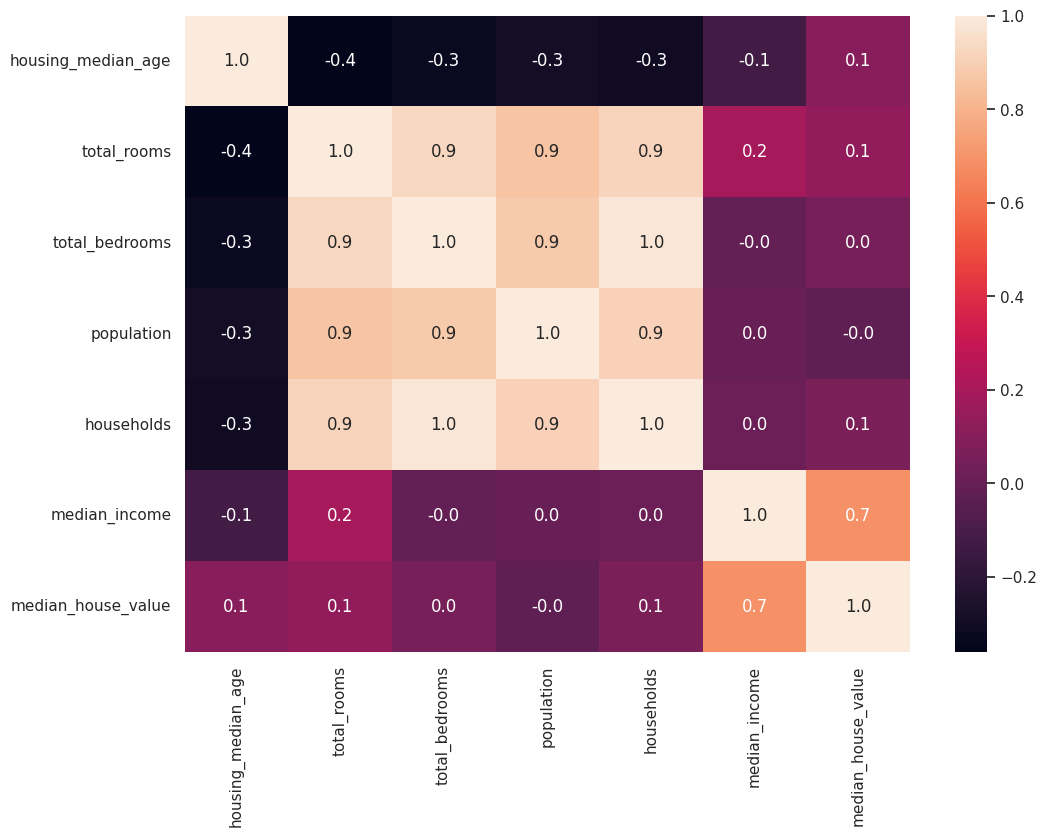

In [21]:
sns.heatmap(h, annot=True, fmt=".1f")
plt.show()

# **Preprocessing Data**

In [22]:
X=data_houses.drop(["median_house_value"],axis=1)
Y=data_houses["median_house_value"]
Y=pd.DataFrame(Y)

In [23]:
X.head()

housing_median_age  total_rooms  total_bedrooms  population  households  \
0                41.0        880.0           129.0       322.0       126.0   
1                21.0       7099.0          1106.0      2401.0      1138.0   
2                52.0       1467.0           190.0       496.0       177.0   
3                52.0       1274.0           235.0       558.0       219.0   
4                52.0       1627.0           280.0       565.0       259.0   

   median_income ocean_proximity  
0         8.3252        NEAR BAY  
1         8.3014        NEAR BAY  
2         7.2574        NEAR BAY  
3         5.6431        NEAR BAY  
4         3.8462        NEAR BAY

In [24]:
Y.head()

median_house_value
0            452600.0
1            358500.0
2            352100.0
3            341300.0
4            342200.0

> **Encoding data**

In [25]:
Encoder=LabelEncoder()
X["ocean_proximity"]=Encoder.fit_transform(X["ocean_proximity"])

In [26]:
X.head()

housing_median_age  total_rooms  total_bedrooms  population  households  \
0                41.0        880.0           129.0       322.0       126.0   
1                21.0       7099.0          1106.0      2401.0      1138.0   
2                52.0       1467.0           190.0       496.0       177.0   
3                52.0       1274.0           235.0       558.0       219.0   
4                52.0       1627.0           280.0       565.0       259.0   

   median_income  ocean_proximity  
0         8.3252                3  
1         8.3014                3  
2         7.2574                3  
3         5.6431                3  
4         3.8462                3

> **fill missing values in data**

In [27]:
X.isnull().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [28]:
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
X=imputer.fit_transform(X)

In [29]:
X=pd.DataFrame(X,columns=['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity'])

In [30]:
X.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

> **Split Data**

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=0)
x_train.head()

housing_median_age  total_rooms  total_bedrooms  population  \
12069                 6.0        502.0            76.0       228.0   
15925                52.0       2381.0           492.0      1485.0   
11162                26.0       1718.0           385.0      1022.0   
4904                 38.0        697.0           208.0       749.0   
4683                 52.0       2373.0           601.0      1135.0   

       households  median_income  ocean_proximity  
12069        65.0         4.2386              1.0  
15925       447.0         4.3898              3.0  
11162       368.0         3.9333              0.0  
4904        206.0         1.4653              0.0  
4683        576.0         3.1765              0.0

In [32]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12069 to 2732
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  16512 non-null  float64
 1   total_rooms         16512 non-null  float64
 2   total_bedrooms      16512 non-null  float64
 3   population          16512 non-null  float64
 4   households          16512 non-null  float64
 5   median_income       16512 non-null  float64
 6   ocean_proximity     16512 non-null  float64
dtypes: float64(7)
memory usage: 1.0 MB


In [33]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 14740 to 4148
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  4128 non-null   float64
 1   total_rooms         4128 non-null   float64
 2   total_bedrooms      4128 non-null   float64
 3   population          4128 non-null   float64
 4   households          4128 non-null   float64
 5   median_income       4128 non-null   float64
 6   ocean_proximity     4128 non-null   float64
dtypes: float64(7)
memory usage: 258.0 KB


In [34]:
y_train.head()

median_house_value
12069            500001.0
15925            270000.0
11162            196100.0
4904             118800.0
4683             225000.0

# **Regression Models**

> **Multi Regression**

In [35]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred=reg_model.predict(x_test)
y_pred

array([[197755.74326122],
       [282838.08464988],
       [221343.36814707],
       ...,
       [140009.90532516],
       [276166.08346618],
       [215091.5515162 ]])

**Evaluate the model**

In [38]:
print("score_test=", reg_model.score(x_test , y_test)*100)
print("score_train=", reg_model.score(x_train , y_train)*100)
print("mean_squared_error=", mean_squared_error(y_test, y_pred))
print("mean_absolute_error=", mean_absolute_error(y_test, y_pred))
print("r2_score=", r2_score(y_test, y_pred))

score_test= 55.39824079470377
score_train= 57.188671648605464
mean_squared_error= 5815868256.760925
mean_absolute_error= 56280.11651225662
r2_score= 0.5539824079470377


> **Lasso Regression**

In [96]:
lreg_model=Lasso(alpha=.8)
lreg_model.fit(x_train,y_train)

Lasso(alpha=0.8)

In [97]:
y_predl=lreg_model.predict(x_test)
y_predl

array([197754.4108628 , 282838.21853347, 221343.49345721, ...,
       140010.28076453, 276165.79894439, 215091.84324394])

**Evaluate the model**

In [98]:
print("score_test=", lreg_model.score(x_test , y_test)*100)
print("score_train=", lreg_model.score(x_train , y_train)*100)
print("mean_squared_error=", mean_squared_error(y_test, y_predl))
print("mean_absolute_error=", mean_absolute_error(y_test, y_predl))
print("r2_score=", r2_score(y_test, y_predl))

score_test= 55.3982436669068
score_train= 57.18867164410325
mean_squared_error= 5815867882.238604
mean_absolute_error= 56280.15419975089
r2_score= 0.553982436669068


> **Ridge Regression**

In [99]:
Rreg_model=Ridge(alpha=.8)
Rreg_model.fit(x_train,y_train)

Ridge(alpha=0.8)

In [100]:
y_predR=Rreg_model.predict(x_test)
y_predR

array([[197755.01948702],
       [282837.27232925],
       [221343.53572405],
       ...,
       [140010.69647744],
       [276165.05173399],
       [215091.34409852]])

**Evaluate the model**

In [46]:
print("score_test=", Rreg_model.score(x_test , y_test)*100)
print("score_train=", Rreg_model.score(x_train , y_train)*100)
print("mean_squared_error=", mean_squared_error(y_test, y_predR))
print("mean_absolute_error=", mean_absolute_error(y_test, y_predR))
print("r2_score=", r2_score(y_test, y_predR))

score_test= 55.39823811993205
score_train= 57.18867162321437
mean_squared_error= 5815868605.539096
mean_absolute_error= 56280.28125426012
r2_score= 0.5539823811993205


> **SVR Regression**

In [63]:
scaler=StandardScaler()
x_train_svr=scaler.fit_transform(x_train)
y_train_svr=scaler.fit_transform(y_train)
x_test_svr=scaler.fit_transform(x_test)
y_test_svr=scaler.fit_transform(y_test)
x_train_svr

array([[-1.79507596e+00, -9.77736238e-01, -1.09836953e+00, ...,
        -1.13564960e+00,  1.90012472e-01, -1.18147979e-01],
       [ 1.85553889e+00, -1.18500587e-01, -1.08593051e-01, ...,
        -1.36881711e-01,  2.69310717e-01,  1.28686421e+00],
       [-2.07852115e-01, -4.21679532e-01, -3.63174982e-01, ...,
        -3.43433186e-01,  2.98950499e-02, -8.20654075e-01],
       ...,
       [ 1.88953847e-01, -5.52919889e-01,  5.45395890e-04, ...,
        -2.78068795e-01, -3.55897205e-01,  1.98937031e+00],
       [ 4.27037424e-01, -2.35565157e-01, -9.43174288e-02, ...,
        -8.19756231e-02,  9.20531819e-01, -8.20654075e-01],
       [-1.08082523e+00, -6.71813593e-01, -4.98793393e-01, ...,
        -5.26453479e-01, -1.30490629e+00, -1.18147979e-01]])

In [64]:
y_train_svr

array([[ 2.53052249],
       [ 0.54240803],
       [-0.09637901],
       ...,
       [ 0.70923604],
       [ 2.3973972 ],
       [-1.191566  ]])

In [65]:
SVR_model=SVR()
SVR_model.fit(x_train_svr,y_train_svr)

SVR()

In [66]:
y_predS=SVR_model.predict(x_test_svr)
y_predS

array([-0.42168991,  0.57556291, -0.52046226, ..., -0.80349138,
        0.23379123, -0.16275275])

**Evaluate the model**

In [68]:
print("score_test=", SVR_model.score(x_test_svr , y_test_svr)*100)
print("score_train=", SVR_model.score(x_train_svr, y_train_svr)*100)
print("mean_squared_error=", mean_squared_error(y_test, y_predS))
print("mean_absolute_error=", mean_absolute_error(y_test, y_predS))
print("r2_score=", r2_score(y_test, y_predS))

score_test= 71.95423031925468
score_train= 73.15770535955804
mean_squared_error= 55179083366.47324
mean_absolute_error= 205279.56306078166
r2_score= -3.231671146641612


> **RandomForestRegressor**

In [93]:
foreg_model=RandomForestRegressor(max_depth=20,random_state=42)
foreg_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, random_state=42)

In [94]:
y_predf=foreg_model.predict(x_test)
y_predf

array([178679.98134921, 266266.37289562, 146402.4479853 , ...,
       130861.79939335, 217229.88030303, 204657.48594029])

**Evaluate the model**

In [95]:
print("score_test=", foreg_model.score(x_test , y_test)*100)
print("score_train=", foreg_model.score(x_train, y_train)*100)
print("mean_squared_error=", mean_squared_error(y_test, y_predf))
print("mean_absolute_error=", mean_absolute_error(y_test, y_predf))
print("r2_score=", r2_score(y_test, y_predf))

score_test= 69.69049261338924
score_train= 95.69908349072242
mean_squared_error= 3952223074.3517046
mean_absolute_error= 44003.41142069943
r2_score= 0.6969049261338924


> **DecisionTreeRegressor**

In [90]:
tree_model=DecisionTreeRegressor(max_depth=15,random_state=42)
tree_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

In [91]:
y_predt=tree_model.predict(x_test)
y_predt

array([143950.        , 251466.66666667, 135552.63157895, ...,
       147057.14285714, 221251.51515152, 178625.        ])

**Evaluate the model**

In [92]:
print("score_test=", tree_model.score(x_test , y_test)*100)
print("score_train=", tree_model.score(x_train, y_train)*100)
print("mean_squared_error=", mean_squared_error(y_test, y_predt))
print("mean_absolute_error=", mean_absolute_error(y_test, y_predt))
print("r2_score=", r2_score(y_test, y_predt))

score_test= 50.11335160181293
score_train= 94.29845073339976
mean_squared_error= 6504993973.886966
mean_absolute_error= 54842.23030059464
r2_score= 0.5011335160181293


**Thanks**